In [160]:
import numpy as np
import pandas as pd
import collections

import tensorflow as tf # Machine Learning
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization

## Read in Data
#### Data can be found on UCI Machine Learning Repository (link below)
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [161]:
df = pd.read_csv('data/breastcancer.csv')

df.head()# Display first five columns

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [162]:
# Drop unwanted columns.
df = df.drop(['id', 'Unnamed: 32', 'smoothness_mean', 
              'compactness_mean', 'concavity_mean', 
              'fractal_dimension_mean', 'fractal_dimension_worst',
              'concave points_mean', 'symmetry_mean' , 'radius_se',
              'texture_se', 'symmetry_worst', 'concave points_worst',
              'fractal_dimension_se', 'symmetry_se', 'concavity_se', 
              'compactness_se', 'smoothness_se','area_se', 'perimeter_se', 
              'concave points_se', 'radius_worst', 'texture_worst', 
              'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst'], axis=1)

In [163]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,M,17.99,10.38,122.80,1001.0
1,M,20.57,17.77,132.90,1326.0
2,M,19.69,21.25,130.00,1203.0
3,M,11.42,20.38,77.58,386.1
4,M,20.29,14.34,135.10,1297.0


## Visualize Data
### How many patients have malignant versus benign cancer ?

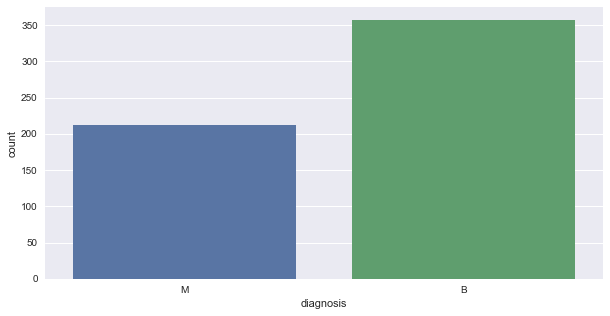

In [164]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(df['diagnosis'], label='count')

plt.show()

Diagnosis (M = malignant, B = benign) 

In [165]:
np_diagnosis = np.array(df['diagnosis'])
# Display count of M & B
collections.Counter(np_diagnosis)

Counter({'B': 357, 'M': 212})

* Malignant cancer patients: **212**
* Benign cancer patients: **357**

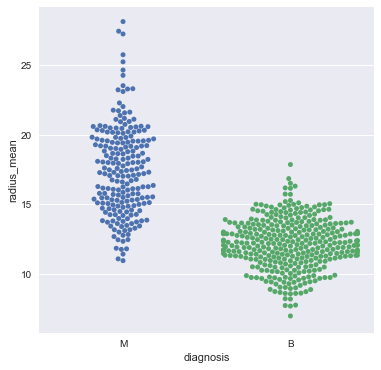

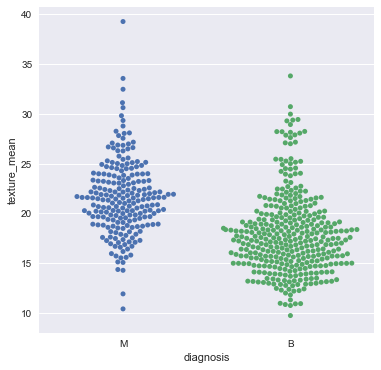

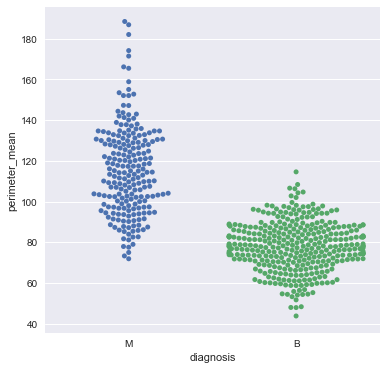

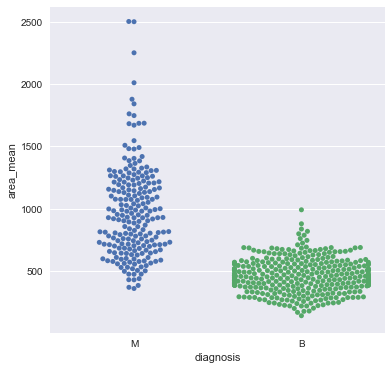

In [166]:
# Mean of radius
plt.figure(figsize=(6,6))
sns.swarmplot(x=df['diagnosis'], y=df['radius_mean'])
plt.show()

# Mean of texture
plt.figure(figsize=(6,6))
sns.swarmplot(x=df['diagnosis'], y=df['texture_mean'])
plt.show()

# Mean of perimeter
plt.figure(figsize=(6,6))
sns.swarmplot(x=df['diagnosis'], y=df['perimeter_mean'])
plt.show()

# Mean of area
plt.figure(figsize=(6,6))
sns.swarmplot(x=df['diagnosis'], y=df['area_mean'])
plt.show()

## Prepare data for Machine Learning

In [167]:
# Rename the value of diagnosis. 1 for Malignant and 0 for Benign
df.loc[df['diagnosis'] == "M", 'diagnosis'] = 1
df.loc[df['diagnosis'] == "B", 'diagnosis'] = 0

In [168]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,1,17.99,10.38,122.80,1001.0
1,1,20.57,17.77,132.90,1326.0
2,1,19.69,21.25,130.00,1203.0
3,1,11.42,20.38,77.58,386.1
4,1,20.29,14.34,135.10,1297.0


In [169]:
df.loc[df.diagnosis == 0, 'benign'] = 1
df.loc[df.diagnosis == 1, 'benign'] = 0

In [170]:
# Convert benign column type to integer
df['benign'] = df.benign.astype(int)

In [171]:
# Rename 'Class' to 'Malignant'.
df = df.rename(columns={'diagnosis': 'malignant'})

In [172]:
df.head()

,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,benign
0,1,17.99,10.38,122.80,1001.0,0
1,1,20.57,17.77,132.90,1326.0,0
2,1,19.69,21.25,130.00,1203.0,0
3,1,11.42,20.38,77.58,386.1,0
4,1,20.29,14.34,135.10,1297.0,0


In [173]:
Malignant = df[df.malignant == 1]
Benign = df[df.benign == 1]

In [174]:
Malignant.head()

,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,benign
0,1,17.99,10.38,122.80,1001.0,0
1,1,20.57,17.77,132.90,1326.0,0
2,1,19.69,21.25,130.00,1203.0,0
3,1,11.42,20.38,77.58,386.1,0
4,1,20.29,14.34,135.10,1297.0,0


In [175]:
Benign.head()

,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,benign
19,0,13.540,14.36,87.46,566.3,1
20,0,13.080,15.71,85.63,520.0,1
21,0,9.504,12.44,60.34,273.9,1
37,0,13.030,18.42,82.61,523.8,1
46,0,8.196,16.84,51.71,201.9,1


In [176]:
train_X = pd.concat([Malignant, Benign], axis=0)

In [177]:
train_X = train_X.drop(columns=['texture_mean', 'radius_mean'])

In [178]:
train_X.head()

,malignant,perimeter_mean,area_mean,benign
0,1,122.80,1001.0,0
1,1,132.90,1326.0,0
2,1,130.00,1203.0,0
3,1,77.58,386.1,0
4,1,135.10,1297.0,0


In [179]:
train_Y = pd.concat([train_X['malignant'], train_X['benign']], axis=1)
train_Y.shape

(569, 2)

In [180]:
train_Y.head()

,malignant,benign
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [181]:
#Drop target features from train_X.
train_X = train_X.drop(['malignant','benign'], axis = 1)
train_X.shape

(569, 2)

In [182]:
input_X = train_X.as_matrix()
input_Y = train_Y.as_matrix()

In [183]:
input_X

array([[ 122.8 , 1001.  ],
       [ 132.9 , 1326.  ],
       [ 130.  , 1203.  ],
       ...,
       [  91.38,  600.4 ],
       [  70.67,  386.  ],
       [  47.92,  181.  ]])

In [184]:
input_Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

## Build Neural Network

In [185]:
# Hyperparameters
learning_rate = 1e-2
epochs = 2500
batch_size = 30

In [186]:
# Input data gateways
X = tf.placeholder(tf.float32, [None, 2], name='X')
Y = tf.placeholder(tf.float32, [None, 2], name='Y')

# create weights
W = tf.Variable(tf.random_normal([2, 2],  stddev=0.1), name='Weights')

# create biases
b = tf.Variable(tf.random_normal([2]), name='Biases')

# operation
Y_hat = tf.matmul(X, W)

In [187]:
# Step 6 - Training !!

# mean squared error
# Loss function
loss = tf.reduce_mean(tf.square(Y_hat - Y))

# Gradient Descent
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## Training

In [189]:
sess = tf.Session()

with sess.as_default():
    # initialize 
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./house', sess.graph)

    
#training 
for i in range(epochs):
    sess.run([optimizer], 
              feed_dict = {
              X: input_X, 
              Y: input_Y
            })

    
    if i < epochs:
        cc = sess.run(loss, feed_dict={ X: input_X, Y: input_Y})
        
        print(f'Epochs: {i}/{epochs}', 'Loss:', '{:.9f}'.format(cc))
print('Optimization Finished!')
training_loss = sess.run(loss, feed_dict={ X: input_X, Y: input_Y })
print(' Final Loss: ', training_loss, 'Final Weights: ', sess.run(W), 'Bias :', sess.run(b))     

writer.close()

Epochs: 0/2500 Loss: 8062.049316406
Epochs: 1/2500 Loss: 6834.644042969
Epochs: 2/2500 Loss: 5752.125976562
Epochs: 3/2500 Loss: 4811.578613281
Epochs: 4/2500 Loss: 4005.314697266
Epochs: 5/2500 Loss: 3319.836669922
Epochs: 6/2500 Loss: 2736.518554688
Epochs: 7/2500 Loss: 2234.817871094
Epochs: 8/2500 Loss: 1796.914062500
Epochs: 9/2500 Loss: 1411.011474609
Epochs: 10/2500 Loss: 1071.684814453
Epochs: 11/2500 Loss: 778.047485352
Epochs: 12/2500 Loss: 531.377441406
Epochs: 13/2500 Loss: 333.173004150
Epochs: 14/2500 Loss: 183.855133057
Epochs: 15/2500 Loss: 82.014564514
Epochs: 16/2500 Loss: 24.070568085
Epochs: 17/2500 Loss: 4.276796341
Epochs: 18/2500 Loss: 15.060533524
Epochs: 19/2500 Loss: 47.680221558
Epochs: 20/2500 Loss: 93.120170593
Epochs: 21/2500 Loss: 143.051849365
Epochs: 22/2500 Loss: 190.645538330
Epochs: 23/2500 Loss: 231.056945801
Epochs: 24/2500 Loss: 261.527954102
Epochs: 25/2500 Loss: 281.152587891
Epochs: 26/2500 Loss: 290.429626465
Epochs: 27/2500 Loss: 290.73031616

Epochs: 280/2500 Loss: 1.100463510
Epochs: 281/2500 Loss: 1.094764948
Epochs: 282/2500 Loss: 1.089094877
Epochs: 283/2500 Loss: 1.083452940
Epochs: 284/2500 Loss: 1.077839375
Epochs: 285/2500 Loss: 1.072253585
Epochs: 286/2500 Loss: 1.066695690
Epochs: 287/2500 Loss: 1.061165214
Epochs: 288/2500 Loss: 1.055662036
Epochs: 289/2500 Loss: 1.050186396
Epochs: 290/2500 Loss: 1.044737935
Epochs: 291/2500 Loss: 1.039316535
Epochs: 292/2500 Loss: 1.033921599
Epochs: 293/2500 Loss: 1.028553724
Epochs: 294/2500 Loss: 1.023212075
Epochs: 295/2500 Loss: 1.017897010
Epochs: 296/2500 Loss: 1.012608171
Epochs: 297/2500 Loss: 1.007344961
Epochs: 298/2500 Loss: 1.002107859
Epochs: 299/2500 Loss: 0.996896625
Epochs: 300/2500 Loss: 0.991711438
Epochs: 301/2500 Loss: 0.986551225
Epochs: 302/2500 Loss: 0.981416881
Epochs: 303/2500 Loss: 0.976307333
Epochs: 304/2500 Loss: 0.971223354
Epochs: 305/2500 Loss: 0.966164291
Epochs: 306/2500 Loss: 0.961129606
Epochs: 307/2500 Loss: 0.956119895
Epochs: 308/2500 Los

Epochs: 573/2500 Loss: 0.252740353
Epochs: 574/2500 Loss: 0.251736343
Epochs: 575/2500 Loss: 0.250739902
Epochs: 576/2500 Loss: 0.249750867
Epochs: 577/2500 Loss: 0.248769432
Epochs: 578/2500 Loss: 0.247795358
Epochs: 579/2500 Loss: 0.246828660
Epochs: 580/2500 Loss: 0.245869324
Epochs: 581/2500 Loss: 0.244917244
Epochs: 582/2500 Loss: 0.243972436
Epochs: 583/2500 Loss: 0.243034720
Epochs: 584/2500 Loss: 0.242104292
Epochs: 585/2500 Loss: 0.241180852
Epochs: 586/2500 Loss: 0.240264565
Epochs: 587/2500 Loss: 0.239355266
Epochs: 588/2500 Loss: 0.238452956
Epochs: 589/2500 Loss: 0.237557679
Epochs: 590/2500 Loss: 0.236669213
Epochs: 591/2500 Loss: 0.235787600
Epochs: 592/2500 Loss: 0.234912753
Epochs: 593/2500 Loss: 0.234044701
Epochs: 594/2500 Loss: 0.233183369
Epochs: 595/2500 Loss: 0.232328743
Epochs: 596/2500 Loss: 0.231480762
Epochs: 597/2500 Loss: 0.230639383
Epochs: 598/2500 Loss: 0.229804575
Epochs: 599/2500 Loss: 0.228976265
Epochs: 600/2500 Loss: 0.228154451
Epochs: 601/2500 Los

Epochs: 814/2500 Loss: 0.147745430
Epochs: 815/2500 Loss: 0.147629201
Epochs: 816/2500 Loss: 0.147514164
Epochs: 817/2500 Loss: 0.147400320
Epochs: 818/2500 Loss: 0.147287667
Epochs: 819/2500 Loss: 0.147176161
Epochs: 820/2500 Loss: 0.147065789
Epochs: 821/2500 Loss: 0.146956593
Epochs: 822/2500 Loss: 0.146848515
Epochs: 823/2500 Loss: 0.146741569
Epochs: 824/2500 Loss: 0.146635726
Epochs: 825/2500 Loss: 0.146530971
Epochs: 826/2500 Loss: 0.146427274
Epochs: 827/2500 Loss: 0.146324724
Epochs: 828/2500 Loss: 0.146223173
Epochs: 829/2500 Loss: 0.146122739
Epochs: 830/2500 Loss: 0.146023333
Epochs: 831/2500 Loss: 0.145924956
Epochs: 832/2500 Loss: 0.145827621
Epochs: 833/2500 Loss: 0.145731285
Epochs: 834/2500 Loss: 0.145635962
Epochs: 835/2500 Loss: 0.145541653
Epochs: 836/2500 Loss: 0.145448327
Epochs: 837/2500 Loss: 0.145355999
Epochs: 838/2500 Loss: 0.145264640
Epochs: 839/2500 Loss: 0.145174250
Epochs: 840/2500 Loss: 0.145084813
Epochs: 841/2500 Loss: 0.144996300
Epochs: 842/2500 Los

Epochs: 1087/2500 Loss: 0.137700424
Epochs: 1088/2500 Loss: 0.137695909
Epochs: 1089/2500 Loss: 0.137691483
Epochs: 1090/2500 Loss: 0.137687057
Epochs: 1091/2500 Loss: 0.137682751
Epochs: 1092/2500 Loss: 0.137678459
Epochs: 1093/2500 Loss: 0.137674257
Epochs: 1094/2500 Loss: 0.137670085
Epochs: 1095/2500 Loss: 0.137666002
Epochs: 1096/2500 Loss: 0.137661949
Epochs: 1097/2500 Loss: 0.137657970
Epochs: 1098/2500 Loss: 0.137654021
Epochs: 1099/2500 Loss: 0.137650132
Epochs: 1100/2500 Loss: 0.137646303
Epochs: 1101/2500 Loss: 0.137642547
Epochs: 1102/2500 Loss: 0.137638792
Epochs: 1103/2500 Loss: 0.137635142
Epochs: 1104/2500 Loss: 0.137631536
Epochs: 1105/2500 Loss: 0.137627929
Epochs: 1106/2500 Loss: 0.137624413
Epochs: 1107/2500 Loss: 0.137620926
Epochs: 1108/2500 Loss: 0.137617499
Epochs: 1109/2500 Loss: 0.137614116
Epochs: 1110/2500 Loss: 0.137610793
Epochs: 1111/2500 Loss: 0.137607500
Epochs: 1112/2500 Loss: 0.137604222
Epochs: 1113/2500 Loss: 0.137601033
Epochs: 1114/2500 Loss: 0.13

Epochs: 1401/2500 Loss: 0.137385264
Epochs: 1402/2500 Loss: 0.137385234
Epochs: 1403/2500 Loss: 0.137385204
Epochs: 1404/2500 Loss: 0.137385175
Epochs: 1405/2500 Loss: 0.137385130
Epochs: 1406/2500 Loss: 0.137385115
Epochs: 1407/2500 Loss: 0.137385070
Epochs: 1408/2500 Loss: 0.137385011
Epochs: 1409/2500 Loss: 0.137384996
Epochs: 1410/2500 Loss: 0.137384981
Epochs: 1411/2500 Loss: 0.137384936
Epochs: 1412/2500 Loss: 0.137384921
Epochs: 1413/2500 Loss: 0.137384906
Epochs: 1414/2500 Loss: 0.137384847
Epochs: 1415/2500 Loss: 0.137384847
Epochs: 1416/2500 Loss: 0.137384802
Epochs: 1417/2500 Loss: 0.137384787
Epochs: 1418/2500 Loss: 0.137384757
Epochs: 1419/2500 Loss: 0.137384728
Epochs: 1420/2500 Loss: 0.137384683
Epochs: 1421/2500 Loss: 0.137384683
Epochs: 1422/2500 Loss: 0.137384668
Epochs: 1423/2500 Loss: 0.137384608
Epochs: 1424/2500 Loss: 0.137384579
Epochs: 1425/2500 Loss: 0.137384593
Epochs: 1426/2500 Loss: 0.137384549
Epochs: 1427/2500 Loss: 0.137384519
Epochs: 1428/2500 Loss: 0.13

Epochs: 1693/2500 Loss: 0.137383327
Epochs: 1694/2500 Loss: 0.137383312
Epochs: 1695/2500 Loss: 0.137383342
Epochs: 1696/2500 Loss: 0.137383342
Epochs: 1697/2500 Loss: 0.137383312
Epochs: 1698/2500 Loss: 0.137383312
Epochs: 1699/2500 Loss: 0.137383312
Epochs: 1700/2500 Loss: 0.137383342
Epochs: 1701/2500 Loss: 0.137383342
Epochs: 1702/2500 Loss: 0.137383312
Epochs: 1703/2500 Loss: 0.137383312
Epochs: 1704/2500 Loss: 0.137383312
Epochs: 1705/2500 Loss: 0.137383357
Epochs: 1706/2500 Loss: 0.137383327
Epochs: 1707/2500 Loss: 0.137383327
Epochs: 1708/2500 Loss: 0.137383327
Epochs: 1709/2500 Loss: 0.137383342
Epochs: 1710/2500 Loss: 0.137383342
Epochs: 1711/2500 Loss: 0.137383327
Epochs: 1712/2500 Loss: 0.137383297
Epochs: 1713/2500 Loss: 0.137383312
Epochs: 1714/2500 Loss: 0.137383327
Epochs: 1715/2500 Loss: 0.137383327
Epochs: 1716/2500 Loss: 0.137383327
Epochs: 1717/2500 Loss: 0.137383327
Epochs: 1718/2500 Loss: 0.137383312
Epochs: 1719/2500 Loss: 0.137383312
Epochs: 1720/2500 Loss: 0.13

Epochs: 1922/2500 Loss: 0.137383312
Epochs: 1923/2500 Loss: 0.137383312
Epochs: 1924/2500 Loss: 0.137383312
Epochs: 1925/2500 Loss: 0.137383327
Epochs: 1926/2500 Loss: 0.137383327
Epochs: 1927/2500 Loss: 0.137383327
Epochs: 1928/2500 Loss: 0.137383327
Epochs: 1929/2500 Loss: 0.137383327
Epochs: 1930/2500 Loss: 0.137383327
Epochs: 1931/2500 Loss: 0.137383327
Epochs: 1932/2500 Loss: 0.137383327
Epochs: 1933/2500 Loss: 0.137383327
Epochs: 1934/2500 Loss: 0.137383312
Epochs: 1935/2500 Loss: 0.137383312
Epochs: 1936/2500 Loss: 0.137383312
Epochs: 1937/2500 Loss: 0.137383312
Epochs: 1938/2500 Loss: 0.137383312
Epochs: 1939/2500 Loss: 0.137383312
Epochs: 1940/2500 Loss: 0.137383327
Epochs: 1941/2500 Loss: 0.137383327
Epochs: 1942/2500 Loss: 0.137383327
Epochs: 1943/2500 Loss: 0.137383312
Epochs: 1944/2500 Loss: 0.137383327
Epochs: 1945/2500 Loss: 0.137383312
Epochs: 1946/2500 Loss: 0.137383327
Epochs: 1947/2500 Loss: 0.137383327
Epochs: 1948/2500 Loss: 0.137383327
Epochs: 1949/2500 Loss: 0.13

Epochs: 2189/2500 Loss: 0.137383342
Epochs: 2190/2500 Loss: 0.137383342
Epochs: 2191/2500 Loss: 0.137383342
Epochs: 2192/2500 Loss: 0.137383342
Epochs: 2193/2500 Loss: 0.137383342
Epochs: 2194/2500 Loss: 0.137383342
Epochs: 2195/2500 Loss: 0.137383342
Epochs: 2196/2500 Loss: 0.137383342
Epochs: 2197/2500 Loss: 0.137383342
Epochs: 2198/2500 Loss: 0.137383342
Epochs: 2199/2500 Loss: 0.137383342
Epochs: 2200/2500 Loss: 0.137383342
Epochs: 2201/2500 Loss: 0.137383342
Epochs: 2202/2500 Loss: 0.137383342
Epochs: 2203/2500 Loss: 0.137383342
Epochs: 2204/2500 Loss: 0.137383342
Epochs: 2205/2500 Loss: 0.137383342
Epochs: 2206/2500 Loss: 0.137383342
Epochs: 2207/2500 Loss: 0.137383342
Epochs: 2208/2500 Loss: 0.137383342
Epochs: 2209/2500 Loss: 0.137383342
Epochs: 2210/2500 Loss: 0.137383342
Epochs: 2211/2500 Loss: 0.137383342
Epochs: 2212/2500 Loss: 0.137383342
Epochs: 2213/2500 Loss: 0.137383342
Epochs: 2214/2500 Loss: 0.137383342
Epochs: 2215/2500 Loss: 0.137383342
Epochs: 2216/2500 Loss: 0.13

Epochs: 2421/2500 Loss: 0.137383342
Epochs: 2422/2500 Loss: 0.137383342
Epochs: 2423/2500 Loss: 0.137383342
Epochs: 2424/2500 Loss: 0.137383342
Epochs: 2425/2500 Loss: 0.137383342
Epochs: 2426/2500 Loss: 0.137383342
Epochs: 2427/2500 Loss: 0.137383342
Epochs: 2428/2500 Loss: 0.137383342
Epochs: 2429/2500 Loss: 0.137383342
Epochs: 2430/2500 Loss: 0.137383342
Epochs: 2431/2500 Loss: 0.137383342
Epochs: 2432/2500 Loss: 0.137383342
Epochs: 2433/2500 Loss: 0.137383342
Epochs: 2434/2500 Loss: 0.137383342
Epochs: 2435/2500 Loss: 0.137383342
Epochs: 2436/2500 Loss: 0.137383342
Epochs: 2437/2500 Loss: 0.137383342
Epochs: 2438/2500 Loss: 0.137383342
Epochs: 2439/2500 Loss: 0.137383342
Epochs: 2440/2500 Loss: 0.137383342
Epochs: 2441/2500 Loss: 0.137383342
Epochs: 2442/2500 Loss: 0.137383342
Epochs: 2443/2500 Loss: 0.137383342
Epochs: 2444/2500 Loss: 0.137383342
Epochs: 2445/2500 Loss: 0.137383342
Epochs: 2446/2500 Loss: 0.137383342
Epochs: 2447/2500 Loss: 0.137383342
Epochs: 2448/2500 Loss: 0.13

Final Loss: 0.13738333

## Visualize data 

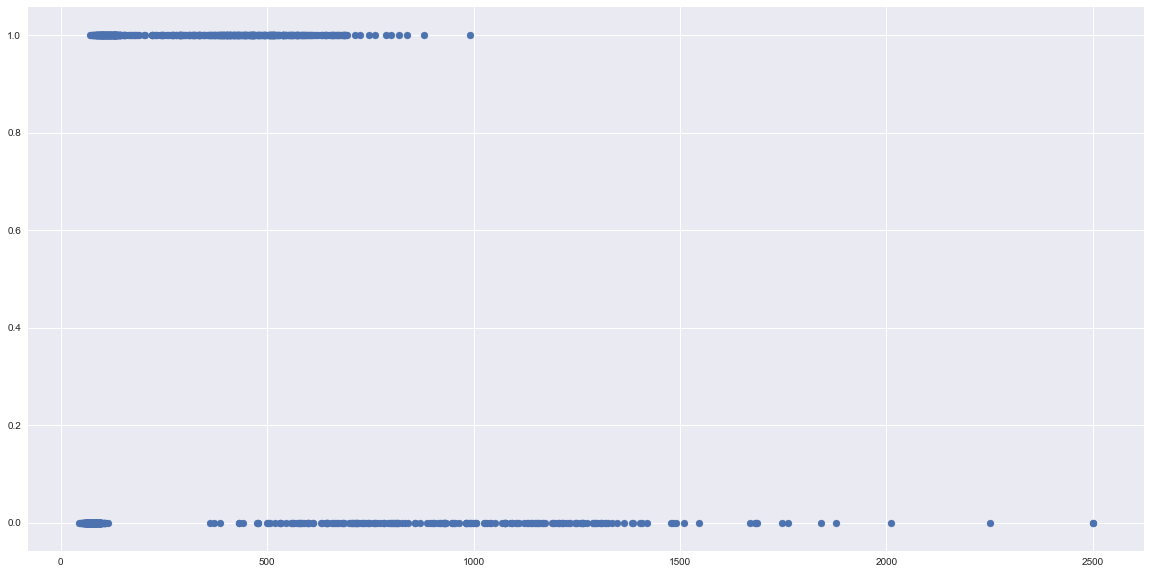

In [190]:
plt.figure(figsize=(20,10))
plt.scatter(input_X, input_Y, alpha=1)
plt.show()

## Prediction

In [191]:
results = sess.run(Y_hat, feed_dict = {X: input_X})

In [192]:
# model predicted correct 6/6 
results 

array([[ 0.66746897,  0.4867375 ],
       [ 1.0170379 , -0.09749532],
       [ 0.8806227 ,  0.14661455],
       ...,
       [ 0.3212471 ,  0.7338742 ],
       [ 0.1533286 ,  0.76904875],
       [ 0.00592856,  0.7291783 ]], dtype=float32)